# 1. Data Exploring
Warren Liu

Winter 2023

University of Washington Bothell

CSS581: Machine Learning

Final Project

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import warnings

from scipy.spatial.distance import pdist, squareform

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

## 1.1 Import data and scale

In [2]:
data = pd.read_csv('../data/card_transdata.csv')

In [3]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
scaler = StandardScaler()
for column in ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']:
    data[column] = scaler.fit_transform(data[[column]])

In [5]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2.274163e-16,6.134027e-17,-2.633751e-16,0.881536,0.350399,0.100608,0.650552,0.087403
std,1.000001e+00,1.000001e+00,1.000001e+00,0.323157,0.477095,0.300809,0.476796,0.282425
min,-4.071511e-01,-1.948839e-01,-6.500182e-01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.479205e-01,-1.834088e-01,-4.816812e-01,1.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.547919e-01,-1.562457e-01,-2.952096e-01,1.000000,0.000000,0.000000,1.000000,0.000000
75%,-1.353107e-02,-6.503759e-02,9.722443e-02,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.621956e+02,4.583845e+02,9.500641e+01,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.477882,-0.182849,0.043491,1.0,1.0,0.0,0.0,0.0
1,-0.241607,-0.188094,-0.189300,1.0,0.0,0.0,0.0,0.0
2,-0.329369,-0.163733,-0.498812,1.0,0.0,0.0,1.0,0.0
3,-0.372854,0.021806,-0.522048,1.0,1.0,0.0,1.0,0.0
4,0.268572,-0.172968,0.142373,1.0,1.0,0.0,1.0,0.0


## 1.2 Validate data

In [7]:
data.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [8]:
data.shape

(1000000, 8)

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.shape

(1000000, 8)

## 1.3 Check data balance

In [11]:
fig = px.pie(
    values=data['fraud'].value_counts().tolist(), 
    names=['Not Fraud', 'Fraud'], 
    title='Fraud vs Not Fraud', 
    color_discrete_sequence=['skyblue', 'red'],
    width=500, height=500
)
fig.show()

print(data['fraud'].value_counts())

0.0    912597
1.0     87403
Name: fraud, dtype: int64


## 1.4 Data Correlation

In [12]:
# This plot takes about an hour to run
# I have attached it in the `output` folder
# Uncomment the code below to run it

# sns.pairplot(data, hue='fraud')

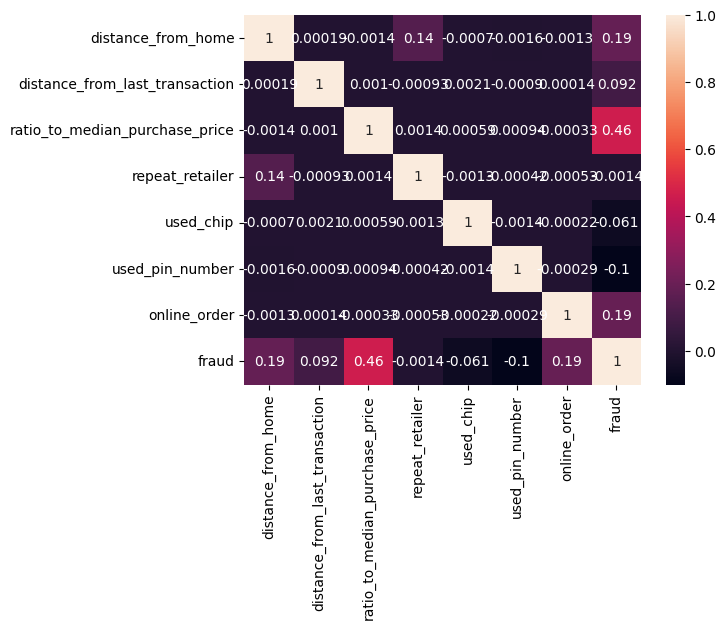

In [13]:
corr = data.corr()
sns.heatmap(corr, annot=True)
plt.show()

## 1.5 Data Visualization

### By PCA

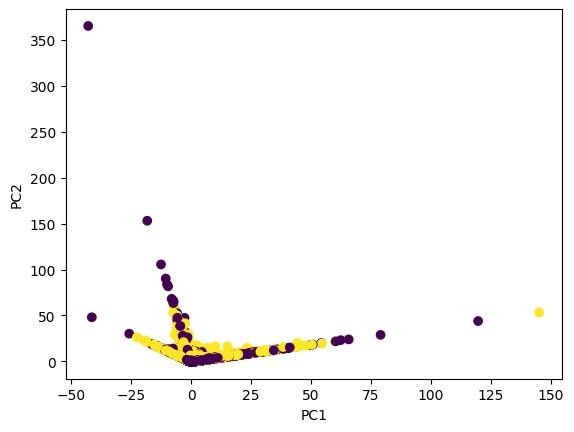

In [14]:
pca = PCA(n_components=2)
x = pca.fit_transform(data.drop(columns=['fraud']))
y = data['fraud']
x.shape[0] == len(y)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    x_with_label = np.concatenate((x, y[:, None]), axis=1)
    plt.scatter(x_with_label[:, 0], x_with_label[:, 1], c=x_with_label[:, 2])
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()


### By TSNE

This plot will look different every time you run it. It is a random projection of the data. But they should be clustered in the same way and look similar.

(10000, 7)


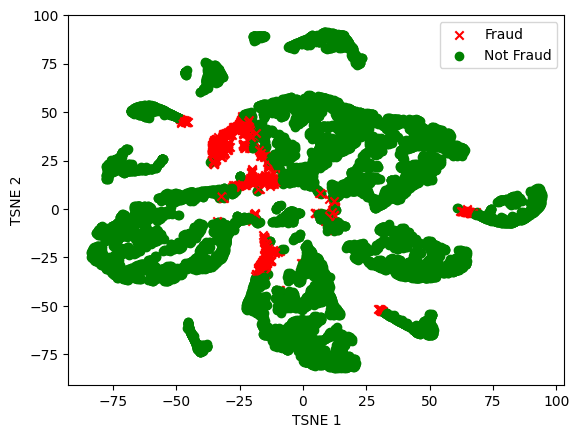

In [15]:
# Can not plot all the data points due to memory constraints
# So I am only plotting the first 10000 data points
x = data.drop('fraud', axis=1)[:10000]
y = data['fraud'][:10000]
print(x.shape)

x_dist = squareform(pdist(x, metric='cosine'))
tsne = TSNE(metric='precomputed', init='random')
x_2d = tsne.fit_transform(x_dist)

for i, label in enumerate(y):
    if label == 1:
        plt.scatter(x_2d[i, 0], x_2d[i, 1], c='r', marker='x', label='Fraud')
    else:
        plt.scatter(x_2d[i, 0], x_2d[i, 1], c='g', marker='o', label='Not Fraud')

plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.legend(handles=[
    plt.scatter([], [], c='r', marker='x', label='Fraud'), 
    plt.scatter([], [], c='g', marker='o', label='Not Fraud')
])
plt.show()

## 1.6 Variability Analysis

In [16]:
x = data.drop('fraud', axis=1)

pca = PCA(n_components=None)
pca.fit(x)

variance_cumulative_sum = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(variance_cumulative_sum > 0.95) + 1
print(f'Number of components for 95% variance: {n_components}\n')

for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f'Component[{i}] {x.columns[i]}: {ratio * 100:.2f}%\n')

Number of components for 95% variance: 6

Component[0] distance_from_home: 27.48%

Component[1] distance_from_last_transaction: 27.42%

Component[2] ratio_to_median_purchase_price: 27.36%

Component[3] repeat_retailer: 6.24%

Component[4] used_chip: 6.23%

Component[5] used_pin_number: 2.80%

Component[6] online_order: 2.48%



## 1.7 Relationship between features

### Similarity

In [17]:
x = data.drop('fraud', axis=1).iloc[:10000]
y = data['fraud'].iloc[:10000]

cosine_sim = cosine_similarity(x)
print('Shape:', cosine_sim.shape)
print(cosine_sim)
print('------------------')

cosine_sim_normal = cosine_sim[y == 0.0]
cosine_sim_fraud = cosine_sim[y == 1.0]
print('Mean of normal transactions:', cosine_sim_normal.mean())
print('Mean of fraud transactions:', cosine_sim_fraud.mean())

Shape: (10000, 10000)
[[1.         0.56951659 0.36625065 ... 0.38178651 0.44480195 0.37525553]
 [0.56951659 1.         0.7341627  ... 0.6020853  0.7003604  0.10151699]
 [0.36625065 0.7341627  1.         ... 0.81216104 0.93303983 0.54182262]
 ...
 [0.38178651 0.6020853  0.81216104 ... 1.         0.93721024 0.44974125]
 [0.44480195 0.7003604  0.93303983 ... 0.93721024 1.         0.510485  ]
 [0.37525553 0.10151699 0.54182262 ... 0.44974125 0.510485   1.        ]]
------------------
Mean of normal transactions: 0.5190414833096394
Mean of fraud transactions: 0.3197857705765725


### Pairwise Distance

In [18]:
euc_dist = pairwise_distances(x, metric='euclidean')
print('Shape:', euc_dist.shape)
print(euc_dist)
print('------------------')

euc_dist_normal = euc_dist[y == 0.0]
euc_dist_fraud = euc_dist[y == 1.0]
print('Mean of normal transactions:', euc_dist_normal.mean())
print('Mean of fraud transactions:', euc_dist_fraud.mean())

Shape: (10000, 10000)
[[0.         1.25374786 1.71642451 ... 1.66687367 1.55065105 1.67238658]
 [1.25374786 0.         1.05075832 ... 1.20363753 1.02692326 1.7382589 ]
 [1.71642451 1.05075832 0.         ... 0.93214388 0.55552512 1.4518954 ]
 ...
 [1.66687367 1.20363753 0.93214388 ... 0.         0.52217997 1.56368596]
 [1.55065105 1.02692326 0.55552512 ... 0.52217997 0.         1.44731924]
 [1.67238658 1.7382589  1.4518954  ... 1.56368596 1.44731924 0.        ]]
------------------
Mean of normal transactions: 1.7055190630080688
Mean of fraud transactions: 3.1050056134783506
